# QuantumDNA: A Python Package for Analyzing Quantum Charge Dynamics in DNA and Exploring Its Biological Relevance

<div style="background-color:#ffe6e6; border-left:6px solid #ff0000; padding:10px; font-weight:bold;">
⚠️ Important: Please ensure that you are using QuantumDNA version 0.1.10.  
Later versions may cause some cells in this notebook to fail.  
If you're using a newer version, please switch to the notebook `QuantumDNA_new.ipynb`.
</div>


In [15]:
import qDNA
print(f"You are currently using qDNA version: {qDNA.__version__}")

You are currently using qDNA version: 0.1.10


In [1]:
#!pip install qDNA

%load_ext autoreload
%autoreload 2
    
from qDNA import *
import matplotlib.pyplot as plt
import numpy as np

## 3. QuantumDNA Package Structure

### 3.1 Workflow Structure

In [9]:
from qDNA import *

# Select TB model and calculate TB params
tb_model = 'ELM'
convert_pdb_to_xyz("tutorials/data/my_geometries/RCSB/1BNA.pdb")
HOMO_dict, LUMO_dict = calc_tb_params(["tutorials/data/my_geometries/RCSB/1BNA"], tb_model)

# Save the calculated TB params
wrap_save_tb_params(HOMO_dict, "1BNA", "hole", tb_model, unit="meV")
wrap_save_tb_params(LUMO_dict, "1BNA", "electron", tb_model, unit="meV")

In [6]:
# Select the DNA segment of interest
upper_strand = ['02G', '03C', '04G']
lower_strand = ['23C', '22G', '21C']

# Choose options
kwargs = dict(unit = "rad/ps", 
              relax_rate = 3.,
              source = "1bna_pymol",
              lower_strand=lower_strand)

In [12]:
# Create instances of TB_Ham and Lindblad_Diss
dna_seq = DNA_Seq(upper_strand, tb_model, lower_strand=lower_strand)
tb_ham = TB_Ham(dna_seq, **kwargs)
lindblad_diss = Lindblad_Diss(tb_ham, **kwargs)

Exciton Lifetime 931.8637274549098 fs
Charge Separation 3.6112084743365056 A


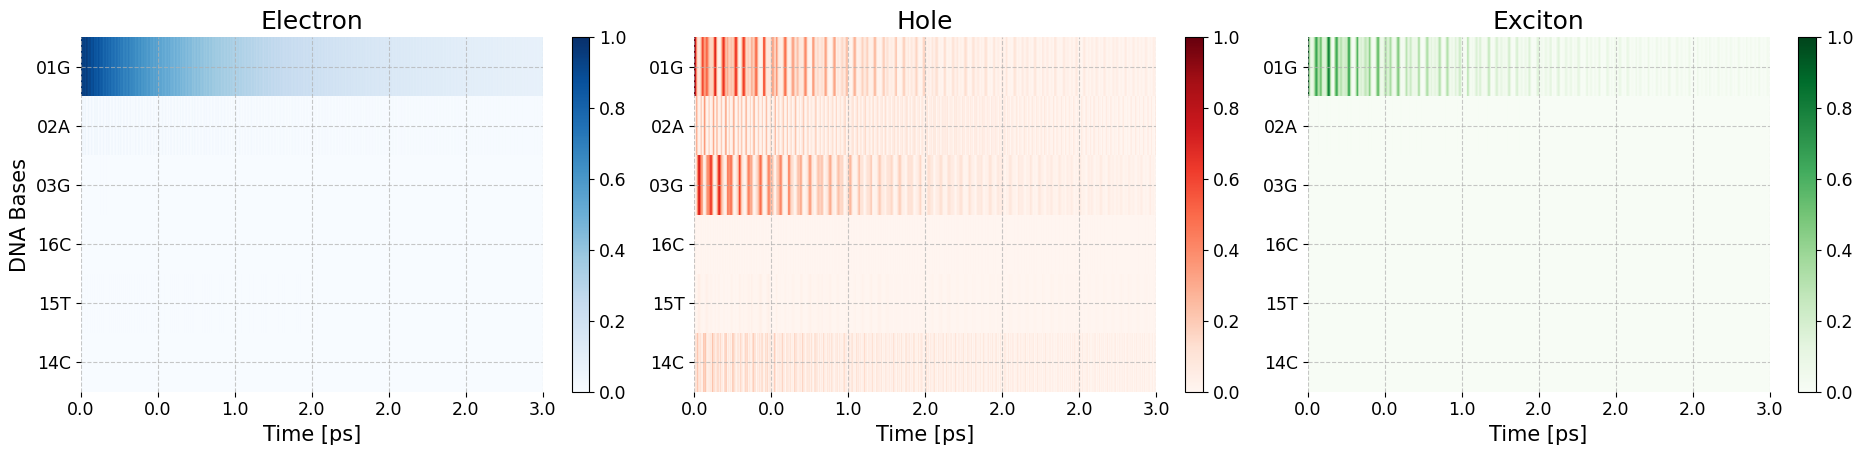

In [13]:
me_solver = ME_Solver(tb_ham, lindblad_diss, **kwargs)

# Plot population dynamics
fig, ax = plot_pops_heatmap(me_solver)

# Calculate exciton lifetime
lifetime = calc_lifetime (upper_strand, tb_model, **kwargs)
print (f"Exciton Lifetime {lifetime} fs")

# Calculate dipole moment 
dipole = calc_dipole (upper_strand, tb_model, **kwargs)
print (f"Charge Separation {dipole} A")

In [7]:
# Select the DNA segment of interest
upper_strand = ['G', 'C', 'G']
lower_strand = ['C', 'G', 'C']

# Choose options
kwargs = dict(unit = "rad/ps", 
              relax_rate = 3.,
              source = "Hawke2010")

In [8]:
# Create instances of TB_Ham and Lindblad_Diss
dna_seq = DNA_Seq(upper_strand, tb_model, lower_strand=lower_strand)
tb_ham = TB_Ham(dna_seq, **kwargs)
lindblad_diss = Lindblad_Diss(tb_ham, **kwargs)

Exciton Lifetime 775.5511022044088 fs
Charge Separation 2.951734389657976 A


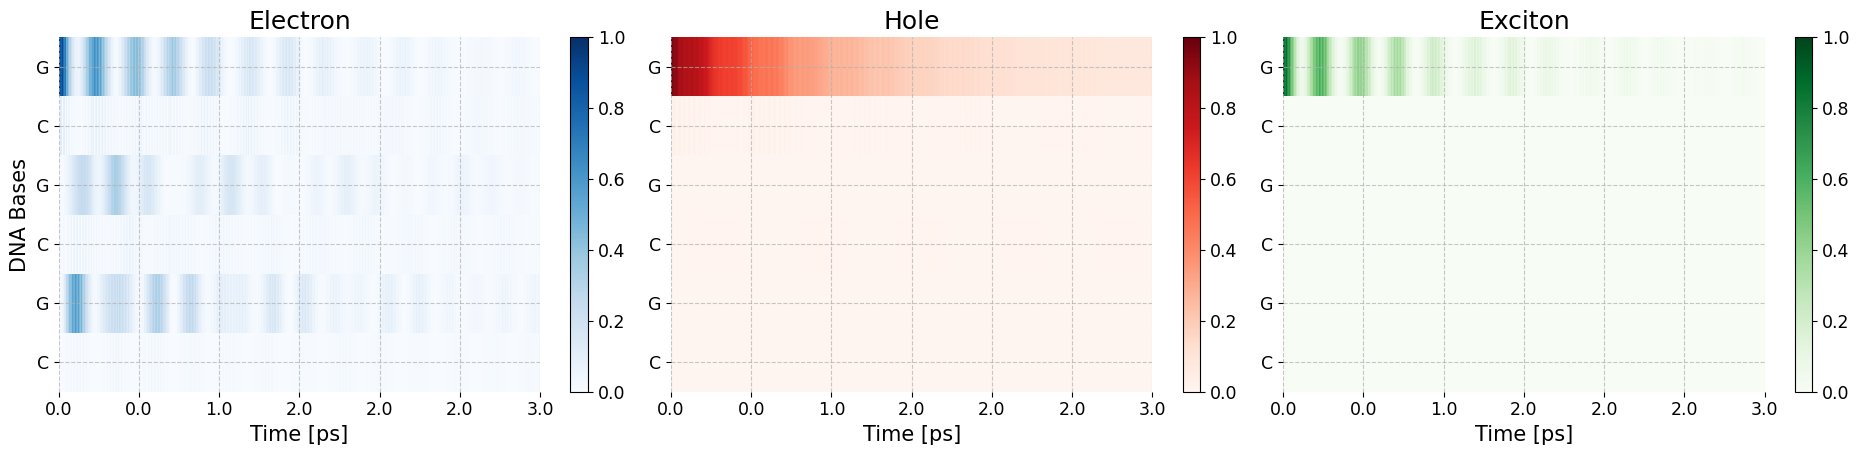

In [9]:
me_solver = ME_Solver(tb_ham, lindblad_diss, **kwargs)

# Plot population dynamics
fig, ax = plot_pops_heatmap(me_solver)

# Calculate exciton lifetime
lifetime = calc_lifetime (upper_strand, tb_model, **kwargs)
print (f"Exciton Lifetime {lifetime} fs")

# Calculate dipole moment 
dipole = calc_dipole (upper_strand, tb_model, **kwargs)
print (f"Charge Separation {dipole} A")

### 3.2 GUI Setup and Usage

In [17]:
from qDNA.gui import qDNA_app

app = qDNA_app()
app.mainloop()

## 4. Methodologies

### 4.1 Linear Combination of Atomic Orbitals (LCAO)

In [10]:
from qDNA import Base, load_xyz, Dimer

base_A = Base(*load_xyz("data/my_geometries/PubChem/A"))
base_B = Base(*load_xyz("data/my_geometries/PubChem/T"))
dimer = Dimer(base_A, base_B)

print("TB parameters")
print("-------------------------------")
print(f"E_HOMO_A: {base_A.E_HOMO}")
print(f"E_LUMO_A: {base_A.E_LUMO}")
print(f"E_HOMO_B: {base_B.E_HOMO}")
print(f"E_LUMO_B: {base_B.E_LUMO}")
print(f"t_HOMO: {dimer.t_HOMO}")
print(f"t_LUMO: {dimer.t_LUMO}")

TB parameters
-------------------------------
E_HOMO_A: -8.4407322055674
E_LUMO_A: -4.353816583266132
E_HOMO_B: -9.090176569811192
E_LUMO_B: -4.269864330116976
t_HOMO: 0.602670072138802
t_LUMO: -1.2373368159162141


### 4.2 Tight-Binding (TB) Models

In [11]:
from qDNA import DNA_Seq, TB_Ham

ham_kwargs = dict(coulomb_param = 1., exchange_param = 1.)
dna_seq = DNA_Seq('GC', 'ELM')
tb_ham = TB_Ham(dna_seq, **ham_kwargs)
tb_matrix = tb_ham.get_matrix()

print(f"TB Hamiltonian: {tb_matrix}")

TB Hamiltonian: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -1.89888431e+04  1.21541396e+02 -1.82312094e+01
   4.55780234e+00  6.53285003e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.43082792e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.03853490e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.21541396e+02 -2.02060287e+04  1.51926745e+00
  -1.82312094e+01  0.00000000e+00  6.53285003e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.43082792e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.03853490e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -1.82312094e+01  1.51926745e+00 -2.02060287e+04
   1.21541396e+02  0.00000000e+00  0.00000000e+00  6.53285003e+01
   

In [12]:
from qDNA import DNA_Seq, TB_Ham

kwargs=dict(description='1P', particles=['hole'])
dna_seq = DNA_Seq('GC', 'ELM')
tb_ham = TB_Ham(dna_seq, **kwargs)

# Amplitudes and frequencies
tb_ham.get_amplitudes('(0, 0)', '(0, 0)')
tb_ham.get_frequencies('(0, 0)', '(0, 0)')

# Average populations
tb_ham.get_average_pop('(0, 0)', '(0, 0)')

{'hole': 0.49019576758190553}

## 5. Application and Benchmarking Examples

### 5.1 Reproduction of Ultrafast Excitonic Dynamics along the DNA

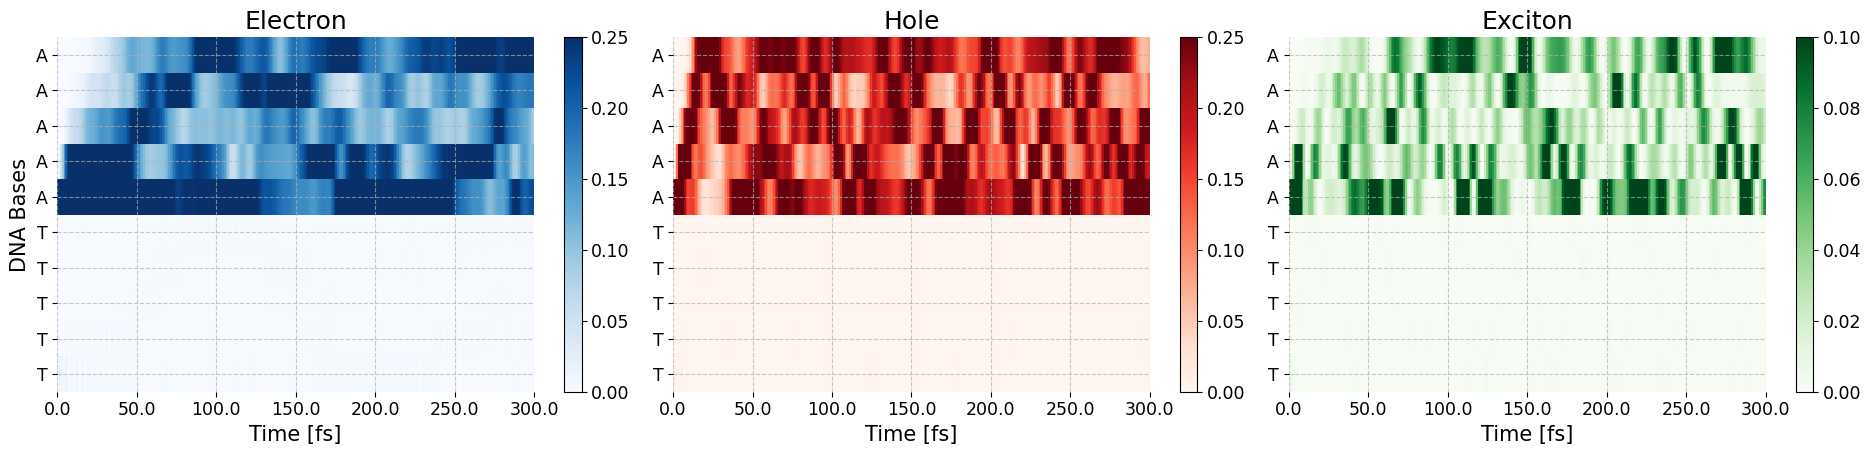

In [13]:
from qDNA import get_me_solver, plot_pops_heatmap

upper_strand = 'AAAAA'
tb_model_name = 'ELM'
kwargs = dict(relaxation=False, 
    source='Bittner2007', unit='eV', 
    coulomb_interaction=2.5, 
    exchange_interaction=1, 
    init_e_state='(0, 4)',
    init_h_state='(0, 4)', 
    t_end=300, t_unit='fs', t_steps=300)

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

fig, ax = plot_pops_heatmap(me_solver,
    heatmap_type='seaborn', 
    vmax_list=[0.25, 0.25, 0.1])

# plt.savefig("6_reproduction_Bittner.svg", transparant=True)
plt.show()

### 5.2 Modeling the Transition between Superexchange and Classical Hopping CT Regimes

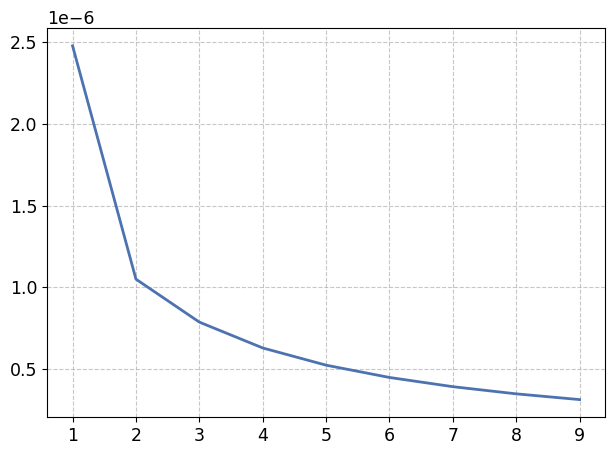

In [14]:
from qDNA import TB_Ham, DNA_Seq

tb_model_name = 'WM'
kwargs = dict(description='1P', particles=['hole'], unit='rad/fs',
              relaxation=False, source='Simserides2014')

front_tail = 'ACGCACGTCGCATAATATTAC'
back_tail = 'TATTATATTACGC'
GGG_per_G = []
for num_steps in range(1, 10):
    bridge = 'TT' + 'GTT' * (num_steps-1)
    upper_strand = front_tail+'G'+bridge+'GGG'+back_tail
    dna_seq = DNA_Seq(upper_strand, tb_model_name)
    tb_ham = TB_Ham(dna_seq, **kwargs)
    
    donor_site = '(0, 21)' # guanine left from the bridge    
    acceptor_sites = [
        f'(0, {21+len(bridge)+1})', 
        f'(0, {21+len(bridge)+2})',  
        f'(0, {21+len(bridge)+3})']

    donor_avg_pop = tb_ham.get_average_pop(donor_site, donor_site)['hole']
    acceptor_avg_pop = 0
    for acceptor_site in acceptor_sites:
        acceptor_avg_pop += tb_ham.get_average_pop(donor_site, acceptor_site)['hole']

    GGG_per_G_ratio = acceptor_avg_pop / donor_avg_pop 
    GGG_per_G.append(GGG_per_G_ratio)

plt.plot(list(range(1,10)), GGG_per_G)

In [3]:
from qDNA import TB_Ham, DNA_Seq

tb_model_name = 'WM'
kwargs = dict(description='1P', particles=['hole'], unit='rad/fs', relaxation=False, source='Simserides2014')

GGG_per_G = []
for num_steps in np.arange(1, 9):
    bridge = 'TT' + 'GTT' * (num_steps-1)
    upper_strand = 'ACGCACGTCGCATAATATTAC' + 'G' + bridge + 'GGG' + 'TATTATATTACGC'
    tb_ham = TB_Ham(DNA_Seq(upper_strand, tb_model_name), **kwargs)
    
    donor_site = '(0, 21)' # guanine left from the bridge    
    acceptor_sites = [f'(0, {21+len(bridge)+1})', f'(0, {21+len(bridge)+2})',  f'(0, {21+len(bridge)+3})']

    donor_avg_pop = tb_ham.get_average_pop(donor_site, donor_site)['hole']
    acceptor_avg_pop = 0
    for acceptor_site in acceptor_sites:
        acceptor_avg_pop += tb_ham.get_average_pop(donor_site, acceptor_site)['hole']

    GGG_per_G_ratio = acceptor_avg_pop / donor_avg_pop 
    GGG_per_G.append(GGG_per_G_ratio)

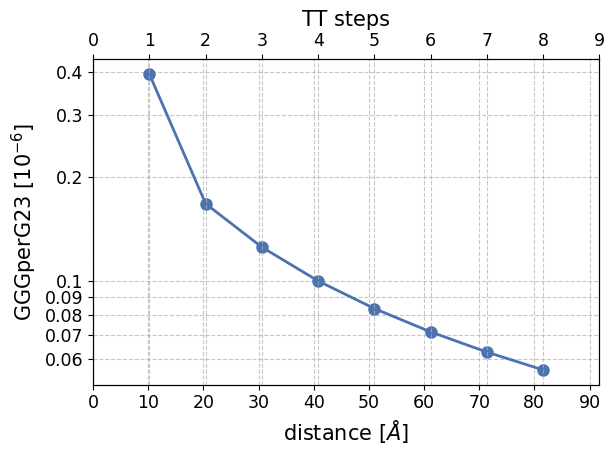

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.4, 4.8))

colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]

ax.plot(np.arange(1, 9) * 3 * 3.4, np.array(GGG_per_G)/(2*np.pi), 'o-', color=colors[0])

top_ticks = np.arange(0,100,10)
top_labels = np.arange(0,100,10)
ax.set_xticks(top_ticks)
ax.set_xticklabels(top_labels)

ax.set_yscale('log')
ax.set_xlim(0, 9*3*3.4)
ax.set_xlabel(r'distance [$\AA$]')
ax.set_ylabel(r'GGGperG23 [$10^{-6}$]')

ax2 = ax.twiny()
# ax2.plot(np.arange(1, 9), np.array(ratio_list)/(2*np.pi) * np.e**2, 'o-', color=colors[1] )

ax2.set_xlabel(r'TT steps')
top_ticks = np.arange(0, 10)
top_labels = np.arange(0, 10) 
ax2.set_xticks(top_ticks)
ax2.set_xticklabels(top_labels)

ax.set_yticks([6e-8, 7e-8, 8e-8, 9e-8, 1e-7, 2e-7, 3e-7, 4e-7])
ax.set_yticklabels([0.06, 0.07, 0.08, 0.09, 0.10, 0.20, 0.30, 0.40])

# plt.savefig("figures/6_reproduce_Simserides.svg", transparent=True)
plt.show()

### 5.3 Quantum Charge Dynamics over an Isolated or Open DNA Chain

<Axes: xlabel='Time [ps]', ylabel='Coherence'>

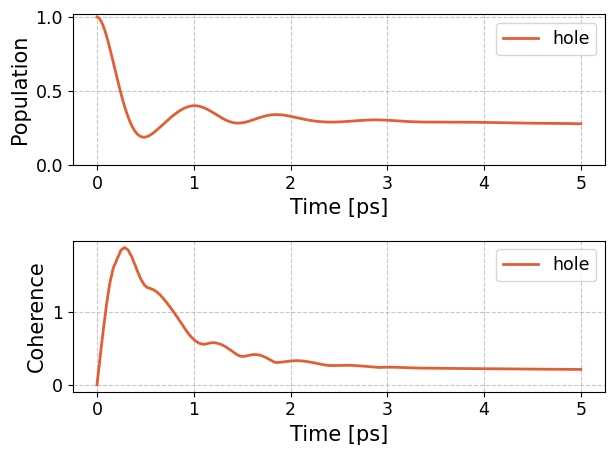

In [17]:
from qDNA import get_me_solver, plot_pop, plot_coh

upper_strand = 'GCACG'
tb_model_name = 'LM'
tb_site = '(0, 0)'

# change particle to ['electron'], loc_deph_rate and glob_deph_rate
kwargs = dict(description='1P', t_end=5, 
        particles=['hole'],
        loc_deph_rate=2,
        glob_deph_rate=0)
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

fig, ax = plt.subplots(2, 1)
plot_pop(ax[0], tb_site, me_solver)
plot_coh(ax[1], me_solver)

In [18]:
import seaborn as sns

upper_strand, tb_model_name = 'GCACG', 'LM'
tb_site = '(0, 0)'
me_solver_list = []

for particle in [['hole'], ['electron']]:
    kwargs = dict(description='1P', particles=particle, t_end=5, t_steps=1000)
    me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
    me_solver.get_result()
    me_solver_list.append( me_solver )
    
    kwargs = dict(description='1P', particles=particle, loc_deph_rate=2, t_end=5, t_steps=1000)
    me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
    me_solver.get_result()
    me_solver_list.append( me_solver )
    
    kwargs = dict(description='1P', particles=particle, glob_deph_rate=2, t_end=5, t_steps=1000)
    me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
    me_solver.get_result()
    me_solver_list.append( me_solver )

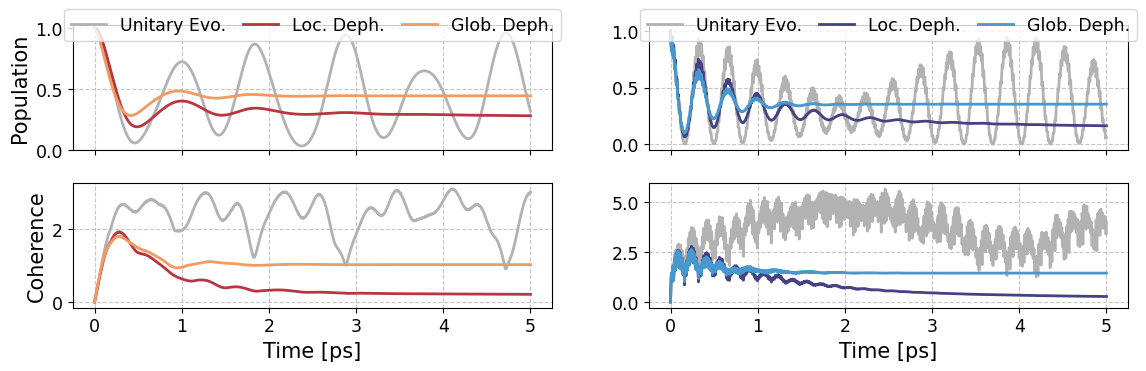

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4), sharex=True)
ax = ax.flatten()

labels = ["Unitary Evo.", "Loc. Deph.", "Glob. Deph.", "Unitary Evo.", "Loc. Deph.", "Glob. Deph."]
ls =  ['-', '-', '-', '-', '-', '-']
color_palette = sns.color_palette('icefire', n_colors=11)
gray='#b2b2b2'
colors = [gray, color_palette[-3], color_palette[-1], gray, color_palette[3], color_palette[1]]

for i, me_solver in enumerate(me_solver_list):
    tb_basis = me_solver.tb_model.tb_basis
    tb_site_idx = tb_basis.index(tb_site)
    ax[0+i//3].plot(
        me_solver.times,
        [dm[tb_site_idx, tb_site_idx].real for dm in me_solver.result],
        label=labels[i],
        color=colors[i], 
        ls=ls[i],
    )
    
    ax[2+i//3].plot(
        me_solver.times,
        [calc_coherence(dm.full()) for dm in me_solver.result],
        color=colors[i], 
        ls=ls[i],
    )

ax[0].set_ylim(0, 1.02)
ax[0].set_ylabel("Population")
ax[2].set_ylabel("Coherence")
ax[2].set_xlabel("Time [" + me_solver.t_unit + "]")
ax[3].set_xlabel("Time [" + me_solver.t_unit + "]")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, columnspacing=1, fontsize='small')
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, columnspacing=1, fontsize='small')

# plt.savefig('figures/6_isolated_open.svg', transparent=True)
plt.show()

## Appendix

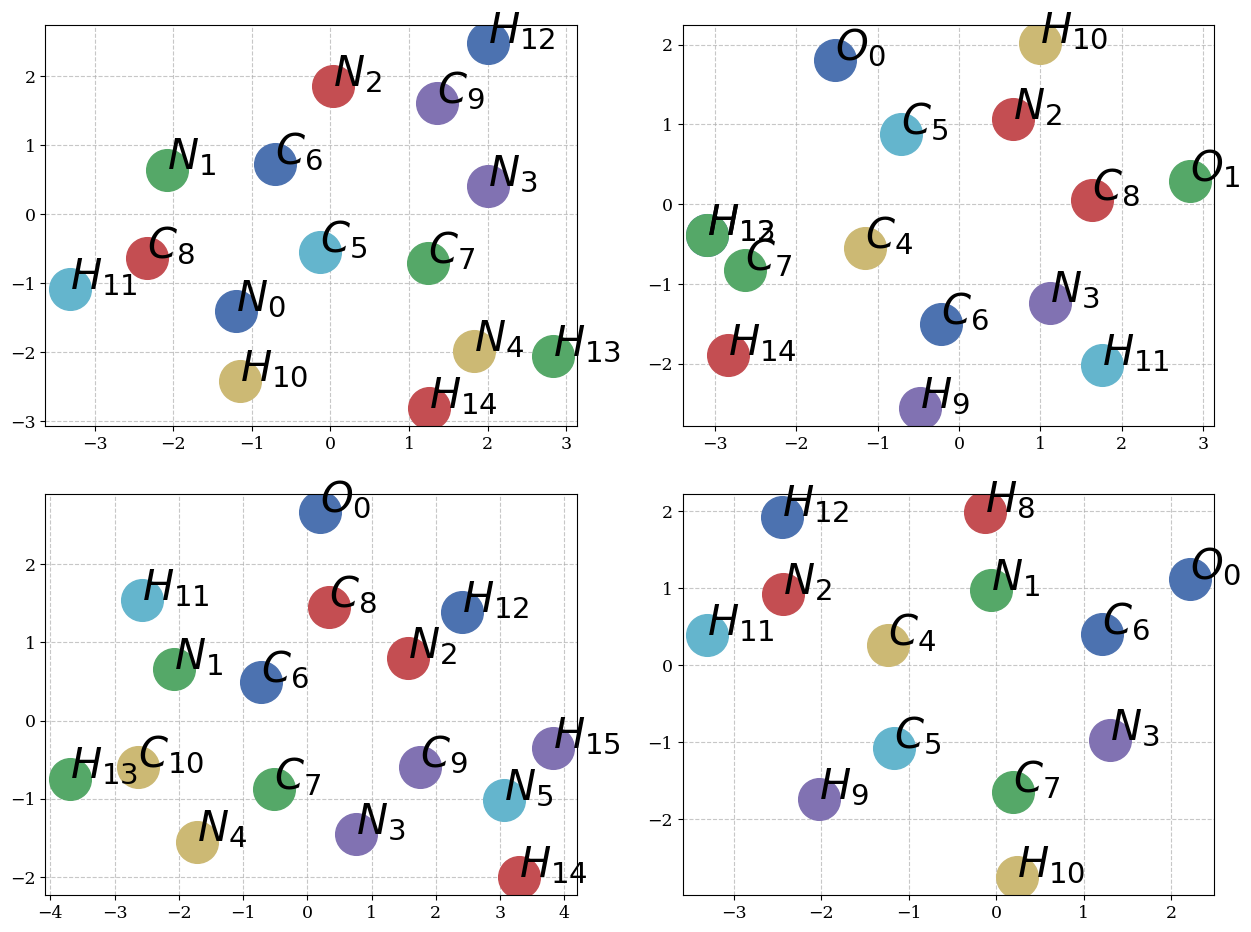

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(6.4*2, 4.8*2))
axes = ax.flatten()

filenames = ['A', 'T', 'G', 'C']
for i, filename in enumerate(filenames):
    directory = os.path.join(os.getcwd(), "data", "my_geometries", "PubChem")
    xyz_identifier, xyz_data = load_xyz(filename, directory)
    base = Base(xyz_identifier, xyz_data)
    
    atom_identifiers = []
    for atom_identifier in base.atom_identifiers:
        atom, number = atom_identifier.split('_')
        atom_identifiers.append( f'${atom}_{{{number}}}$' )
    
    for j, atom_identifier in enumerate(atom_identifiers):
        axes[i].plot( base.atom_coordinates[j, 0], base.atom_coordinates[j, 1], '.', markersize=60)
        axes[i].text( base.atom_coordinates[j, 0], base.atom_coordinates[j, 1], f'{atom_identifier}', fontsize =30)

# plt.savefig('figures/base_geometries.svg', transparent=True)
plt.show()

pi


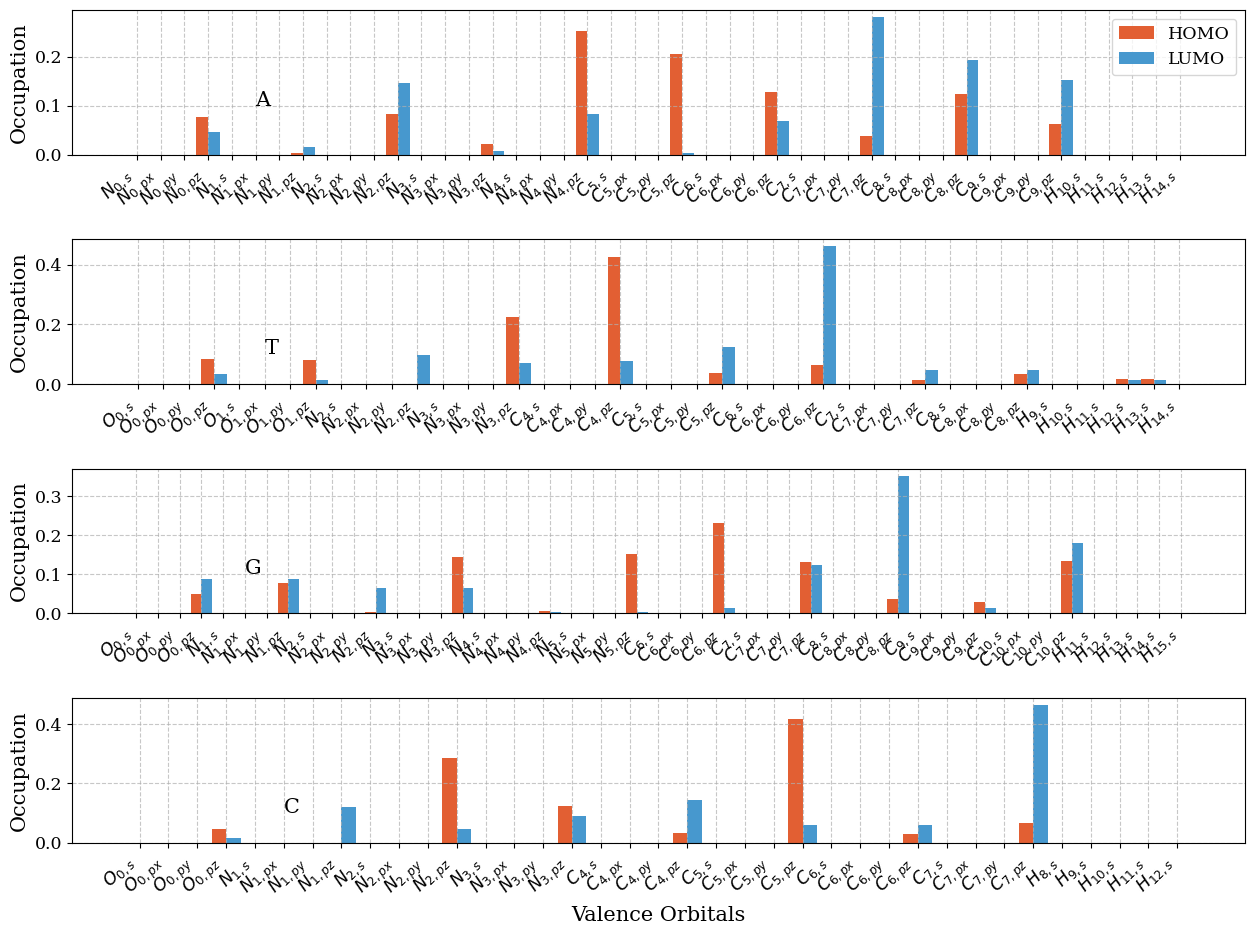

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'serif'

bar_width = 0.5
fig, ax = plt.subplots(4, 1, figsize=(6.4*2, 4.8*2))

filenames = ['A', 'T', 'G', 'C']
for i, filename in enumerate(filenames):
    directory = os.path.join(os.getcwd(), "data", "my_geometries", "PubChem")
    xyz_identifier, xyz_data = load_xyz(filename, directory)
    base = Base(xyz_identifier, xyz_data)

    x = np.arange(base.num_orbitals)
    ax[i].bar(x - bar_width/2, base.HOMO_occupation, width=bar_width, label='HOMO', color='#e25f33')
    ax[i].bar(x + bar_width/2, base.LUMO_occupation, width=bar_width, label='LUMO', color='#4798ce')

    orbital_identifiers = []
    for orbital_identifier in base.orbital_identifiers:
        atom, number, orbital = orbital_identifier.split('_')
        orbital_identifiers.append( f'${atom}_{{ {number}, {orbital} }}$' )
    
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(orbital_identifiers, rotation=45, ha='right', fontsize='small')
    
    ax[i].text(5, 0.1, filename, fontsize=15)
    ax[i].set_ylabel("Occupation")

ax[3].set_xlabel("Valence Orbitals")
ax[0].legend()

print(base.HOMO_type)

# plt.savefig('figures/orbital_occupations.svg', transparent=True)
plt.show()

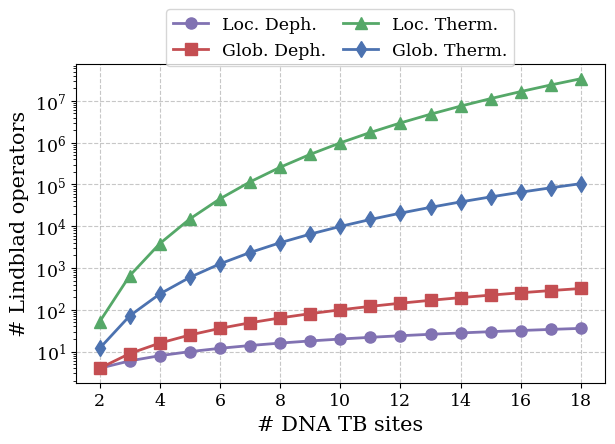

In [24]:
import seaborn as sns
# plot the number of Lindblad operators 

N = np.arange(2, 19)
fig, ax = plt.subplots()
colors = sns.color_palette()[:4]

# Plotting the data with different markers and reduced opacity for lines
ax.plot(N, 2 * N, marker='o', markersize=8, linestyle='-', color=colors[3], alpha=1, label='Loc. Deph.')
ax.plot(N, N**2, marker='s', markersize=8, linestyle='-', color=colors[2], alpha=1, label='Glob. Deph.')
ax.plot(N, N**2 * (N**4 - N**2 + 1), marker='^', markersize=8, linestyle='-', color=colors[1], alpha=1, label='Loc. Therm.')
ax.plot(N, N**4 - N**2, marker='d', markersize=8, linestyle='-', color=colors[0], alpha=1, label='Glob. Therm.')

ax.set_yscale('log')
ax.set_xlabel(r"# DNA TB sites", fontsize=15)
ax.set_ylabel(r"# Lindblad operators", fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, columnspacing=1, fontsize='small')

# fig.savefig('figures/scaling.svg', transparent=True)
plt.show()

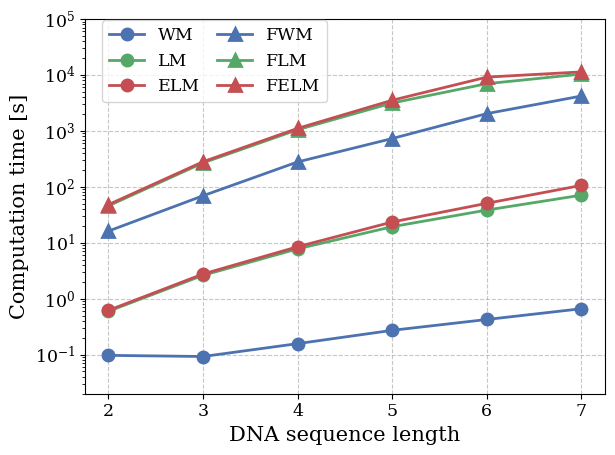

In [25]:
# time for uniform adenine sequences (different lengths and models)
calc_times = np.array([[0.04849529266357422, 0.04625391960144043, 0.07857656478881836, 0.13587403297424316, 0.21225285530090332, 0.3305344581604004],
        [0.2975034713745117, 1.308180570602417, 3.8845632076263428, 9.669641017913818, 19.188920259475708, 35.40109610557556],
        [0.30926942825317383, 1.379915475845337, 4.239468812942505, 11.73042607307434, 25.32820200920105, 52.95796084403992],
        [8.07165561, 34.5582086, 139.004404, 364.221048, 1015.64643, 2094.59942],
        [22.8213988, 133.818269, 523.606570, 1572.64914, 3480.68617, 5173.29872],
        [23.9733094, 140.136105, 553.018477, 1760.12157, 4562.22129, 5655.94587]])

tb_model_list = ['WM', 'LM', 'ELM', 'FWM', 'FLM', 'FELM']
num_bases_list = [2, 3, 4, 5, 6, 7]

colors = colors = sns.color_palette()[:3] * 2
markers = ['o'] * 3 + ['^'] * 3


fig, ax = plt.subplots()

for i, (tb_model, calc_time) in enumerate(zip(tb_model_list,calc_times)):
    ax.plot(num_bases_list, np.array(calc_time)*2, color=colors[i], label=tb_model,
            marker=markers[i], markersize=8, mec=colors[i], mew=2)

ax.legend(loc='upper center', bbox_to_anchor=(0.25, 1.02), ncol=2, columnspacing=1)
ax.set_ylim(0.2*1e-1, 1e5)
ax.set_xlabel('DNA sequence length')
ax.set_ylabel('Computation time [s]')
ax.set_yscale('log')

# plt.savefig('figures/computation_time.svg', transparent=True)
plt.show()